## Define a function to perform 2D Least-Squares Fit

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def polyfit2d(x, y, z, kx=3, ky=3, order=None):
    '''
    Two dimensional polynomial fitting by least squares.
    Fits the functional form f(x,y) = z.

    Notes
    -----
    Resultant fit can be plotted with:
    np.polynomial.polynomial.polygrid2d(x, y, soln.reshape((kx+1, ky+1)))

    Parameters
    ----------
    x, y: array-like, 1d
        x and y coordinates.
    z: np.ndarray, 2d
        Surface to fit.
    kx, ky: int, default is 3
        Polynomial order in x and y, respectively.
    order: int or None, default is None
        If None, all coefficients up to maxiumum kx, ky, ie. up to and including x^kx*y^ky, are considered.
        If int, coefficients up to a maximum of kx+ky <= order are considered.

    Returns
    -------
    Return paramters from np.linalg.lstsq.

    soln: np.ndarray
        Array of polynomial coefficients.
    residuals: np.ndarray
    rank: int
    s: np.ndarray

    '''

    # grid coords
    x, y = np.meshgrid(x, y)
    # coefficient array, up to x^kx, y^ky
    coeffs = np.ones((kx+1, ky+1))

    # solve array
    a = np.zeros((coeffs.size, x.size))

    # for each coefficient produce array x^i, y^j
    for index, (j, i) in enumerate(np.ndindex(coeffs.shape)):
        # do not include powers greater than order
        if order is not None and i + j > order:
            arr = np.zeros_like(x)
        else:
            arr = coeffs[i, j] * x**i * y**j
        a[index] = arr.ravel()

    # do leastsq fitting and return leastsq result
    return np.linalg.lstsq(a.T, np.ravel(z), rcond=None)

## Run some trivial examples:
- a 2D parabola
- a 2D polinomial of degree=3
- a 2D Gaussian

In [34]:
# define example data
x = np.linspace(-1, 1, 40)
y = np.linspace(-1, 1, 40)
noise_level=0.01

# define the mesh of poitns from the example data
X, Y = np.meshgrid(x, y, copy=False)

# PARABOLA EXAMPLE : define the set of points to fit (A parabola of points with some noise)
Z = X**2 + Y**2 + np.random.rand(*X.shape)*noise_level

# K-ORDER EXAMPLE : define the set of points to fit (A parabola of points with some noise)
x_order=3
y_order=3
Z = X**x_order + Y**y_order + np.random.rand(*X.shape)*noise_level

# 2D Gaussian
#def gauss(x, mu=0.0, sigma=1.0):
#    return 1.0 / math.sqrt(2.0*math.pi*sigma**2) * math.exp(-0.5*(x-mu)**2/sigma**2)
#Z= [[gauss(x)*gauss(y) for x in x] for y in y] 

# EXPONETIAL EXAMPLE define the set of points to fit (A parabola of points with some noise)
# import math
# Z = 7*x*y/math.exp(x**2 + y**2)

# do the least-Squares 2D fit 
# specify the order of the fit

coeff, r, rank, s = polyfit2d(x=x, y=y, z=Z,kx=x_order,ky=y_order)

coeff
#r
#rank
#s

array([ 4.69623305e-03,  4.57857928e-05,  4.64558735e-04,  1.00000267e+00,
       -6.56785207e-04,  1.40654968e-03,  1.00962401e-03, -1.69061703e-03,
        2.83560435e-04,  5.18213215e-04, -6.62267411e-04, -5.76342766e-04,
        1.00112486e+00, -7.35194462e-04, -1.92456136e-03,  2.94610229e-04])

In [35]:
print('Matrix rank : %d' %rank) 

Matrix rank : 16


Now evaluate the polinomial function resulting from the coefficients of the fit.
user Polyval to evaluates the polynomial with order k at points (x, y) as :
\begin{equation} 
p(x,y) = \sum_{i=0,j=0}^{k} c_{i,j} * x^i * y^j 
\end{equation}

In [36]:
from numpy.polynomial.polynomial import polyval2d
k=2
fitted_surf = polyval2d(X, Y, coeff.reshape((x_order+1,y_order+1)))

## Display Original points and Fitted surface
 And 1-D cuts on each dimension showing the fit to each dim

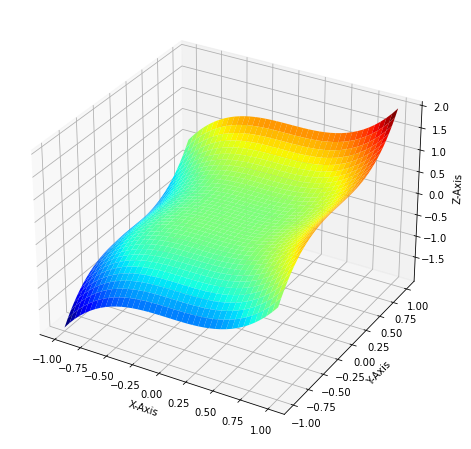

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 3D Projection

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

#ax.plot(X,Y,Z,marker='.',label='bla')

# Surface Plot
ax.plot_surface(X, Y, fitted_surf, cmap=cm.jet)

# Labels

ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')
# Display
plt.show()

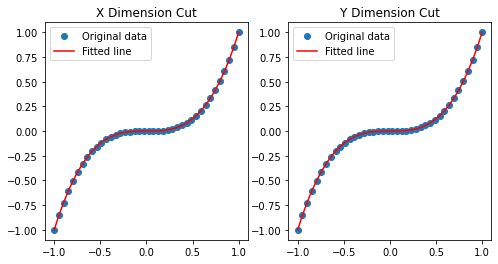

In [38]:
fig, axs = plt.subplots(1,2,figsize=(8,4))
# corte en X
axs[0].plot(x, x**x_order, 'o', label='Original data', markersize=6)
axs[0].plot(x, np.polyval(coeff.reshape((x_order+1,y_order+1))[x_order],x), 'r', label='Fitted line')
axs[0].set_title('X Dimension Cut')
axs[0].legend()
# corte en Y
axs[1].plot(y, y**y_order, 'o', label='Original data', markersize=6)
axs[1].plot(y, np.polyval(coeff.reshape((x_order+1,y_order+1))[y_order],y), 'r', label='Fitted line')
axs[1].set_title('Y Dimension Cut')
axs[1].legend()
plt.show()

plt.show()